# Classic cars classifier using custom dataset from Google Images

In this notebook I present the steps I took to crate a classifier to distinguish between three classic car models, which share some similarities:
* Renault 4GTL
* Citroen 2CV
* Volkswagen Beetle

In [1]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [46]:
folder = 'renault-4gtl'
file = 'urls-renault-4gtl.csv'

In [9]:
folder = 'citroen-2cv'
file = 'urls-citroen-2cv.csv'

In [3]:
folder = 'vw-beetle'
file = 'urls-vw-beetle.csv'

You will need to run this line once per each category.

In [2]:
path = Path('/home/jupyter/data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

NameError: name 'folder' is not defined

In [65]:
path.ls()

[PosixPath('/home/jupyter/data/vw-beetle'),
 PosixPath('/home/jupyter/data/citroen-2cv'),
 PosixPath('/home/jupyter/data/cleaned.csv'),
 PosixPath('/home/jupyter/data/export.pkl'),
 PosixPath('/home/jupyter/data/.ipynb_checkpoints'),
 PosixPath('/home/jupyter/data/renault-4gtl'),
 PosixPath('/home/jupyter/data/models')]

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](images/download_images/upload.png)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [5]:
classes = ['renault-4gtl','vw-beetle','citroen-2cv']

In [67]:
download_images(path/folder/file, dest)

Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc7807aa7b8>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc7807aa7b8>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc7807aa7b8>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessi

KeyboardInterrupt: 

    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc7807aa7b8>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _DataLoaderIter.__del__ at 

  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_byt

Error https://topworldauto.com/pics/Renault/renault-r4-gtl-04.jpg HTTPSConnectionPool(host='topworldauto.com', port=443): Max retries exceeded with url: /pics/Renault/renault-r4-gtl-04.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error http://portugal.portalclassicos.com/mercado/conteudos/uploads/2013/10/307427-800x600.jpg HTTPConnectionPool(host='portugal.portalclassicos.com', port=80): Max retries exceeded with url: /mercado/conteudos/uploads/2013/10/307427-800x600.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fc744507048>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error https://topworldauto.com/photos/Renault/d8/97/20614_renault-4-gtl-flickr-photo-sharing.jpg HTTPSConnectionPool(host='topworldauto.com', port=443): Max retries exceeded with url: /photos/Renault/d8/97/20614_renault-4-gtl-flickr-photo-sharing.jpg (Caus

Then we can remove any images that can't be opened:

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

renault-4gtl


vw-beetle


citroen-2cv


## View data

In [9]:
np.random.seed(42)
#data is an imagedatabuch type
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [53]:
data.classes

['citroen-2cv', 'renault-4gtl', 'vw-beetle']

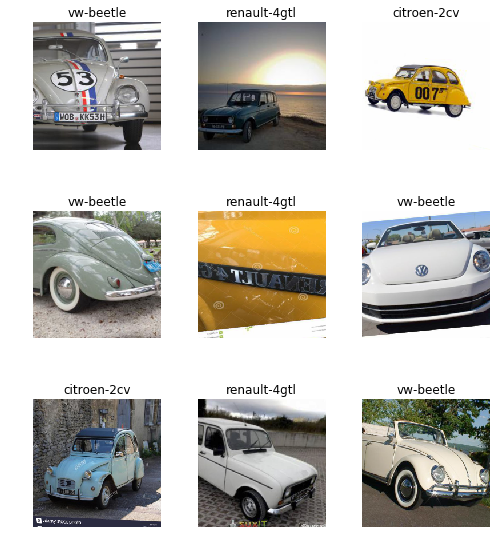

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['citroen-2cv', 'renault-4gtl', 'vw-beetle'], 3, 1510, 377)

## Train model

In [12]:
#create cnn gets pretrained model to facilitate image detection - i used here resnet 34 layers
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.921164,0.432226,0.164456
2,0.650789,0.388126,0.140584
3,0.503679,0.312138,0.106101
4,0.407467,0.308939,0.106101


Pretty accurate. The error rate comes down to 10% sometimes. Let's save this first run, with resnet34 and 4 run cycles as 'stage-1'

In [18]:
learn.save('stage-1')

In [19]:
#then we unfreeze, to try to optimizze and analyze a little bit more
learn.unfreeze()

In [20]:
#analyzes accuracy with learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


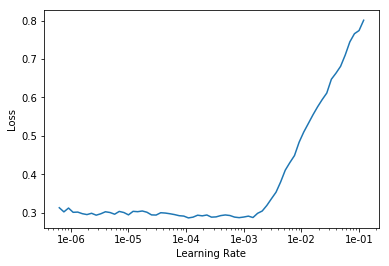

In [21]:
learn.recorder.plot()

The loss increases a lot when learning rate goes over 0.003

In [24]:
#let's try two more cycles with learning rate between 0.003 and 0.0003
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.311131,0.313070,0.100796
2,0.234231,0.288014,0.098143


It seems to have improved a little bit, which is good and expected

In [25]:
#let's save this new version, which ran another 2 cycles with a range of learning rates as 'stage-2'
learn.save('stage-2')

## Interpretation

In [27]:
#and let's analyze stage 2
learn.load('stage-2');

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

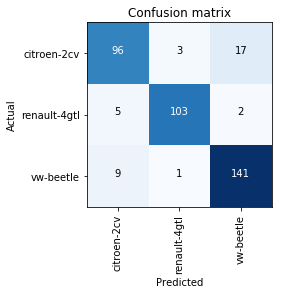

In [29]:
interp.plot_confusion_matrix()

The gratest confusion are citroen-2cv which are identified as vw-beetles, and also the other way around. These cars are somewhat more similar between themselves than the 4l, so this might be expected.

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [31]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [32]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [33]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [35]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [36]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

I didn't clean the images all the way to the end because that would take too long

# Using cleaned data

Recreate ImageDataBunch from `cleaned.csv` to include changes made in the data

In [102]:
# If you already cleaned your data, run this cell instead of the one before
np.random.seed(42)
data = ImageDataBunch.from_csv("/home/jupyter/", folder="data", valid_pct=0.2, csv_labels='/home/jupyter/data/cleaned.csv',
                               ds_tfms=get_transforms(), size=224, num_workers=4, no_check=True).normalize(imagenet_stats)

In [103]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [85]:
data.classes

['citroen-2cv', 'renault-4gtl', 'vw-beetle']

In [104]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.942031,0.262960,0.075893
2,0.574376,0.193714,0.058036
3,0.402599,0.185592,0.062500
4,0.303854,0.180516,0.058036


We got an error rate of around 6%. I would say that's pretty good.

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [105]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [106]:
defaults.device = torch.device('cpu')

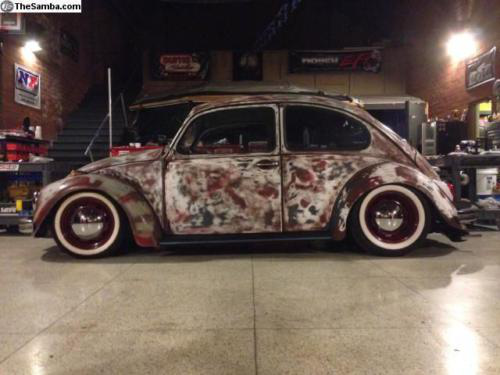

In [129]:
img = open_image('/home/jupyter/data/vw-beetle/00000556.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [109]:
path

PosixPath('/home/jupyter/data')

In [131]:
learn = load_learner(path)

In [127]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category vw-beetle

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)